# Hapiness Forecasting

**LINK TO THE VIDEO: https://drive.google.com/file/d/1Q9FjqhEjgZ-rNyFn28ovcIngqMWCsEpy/view?usp=drive_link**

## 1. Analysis: Frame the problem and look at the big picture

Forecast happiness levels and identify key factors that contribute to happiness at the national level.

**What makes countries happy?**

- unsupervised learning to find common “traits” among regions with similar happiness levels

**How will the happiness score look in 2050?**
- time series regression problem to predict happiness score based on historical data


## 2. Data Acquision

**World Happiness Data**: Data 2006 til 2023

https://worldhappiness.report/data/ Data for Figure 2.1 in year 2024

Explanation of features:
Possitive_Affec (emotions based)t: laugh, enjoyment
Negative_Affect (emotions based): sadness, 

**Immigration Data**  https://www.kaggle.com/datasets/ulrikthygepedersen/migration

**Alcohol Consumption Per Capita Annual**
Total alcohol per capita consumption is the total (sum of recorded and unrecorded alcohol) amount consumed per person (15 years or older) over a calendar year, in litres of pure alcohol, adjusted for tourist consumption.
The estimates for the total alcohol consumption are produced by summing up the 3-year average per capita (15+) recorded alcohol consumption and an estimate of per capita (15+) unrecorded alcohol consumption for a calendar year. Tourist consumption considers tourists visiting the country and inhabitants visiting other countries.
Variable period 2000 – 2018
Source: https://www.kaggle.com/datasets/pralabhpoudel/alcohol-consumption-by-country

**Woman Birth Rate** : https://ourworldindata.org/grapher/children-per-woman-un

## 3. Data Preparation

- Data from external websites was checked for nulls and mapped to a country name mapping provided by the World Hapiness Report. 
- Only relevant columns have been selected for the main problem
- The data from external websites have been left joined on the hapiness data and will serve as an input for EDA analysis. 

For detailed viewew, see the prepare_dataset.py file

## 4. EDA
1. Correlation Analysis to identify which features have high correlation



In [1]:
import numpy as np           
import pandas as pd           
import matplotlib.pyplot as plt                   
import seaborn as sns
import sys
import os
# Add the parent directory to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
import google_drive as gd
from prepare_dataset import split_data_into_test_and_train
from prepare_dataset import merge_happiness_alcohol_fertility_migration

df_happy = merge_happiness_alcohol_fertility_migration()

c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net_migration['Country_Name'].replace({
c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

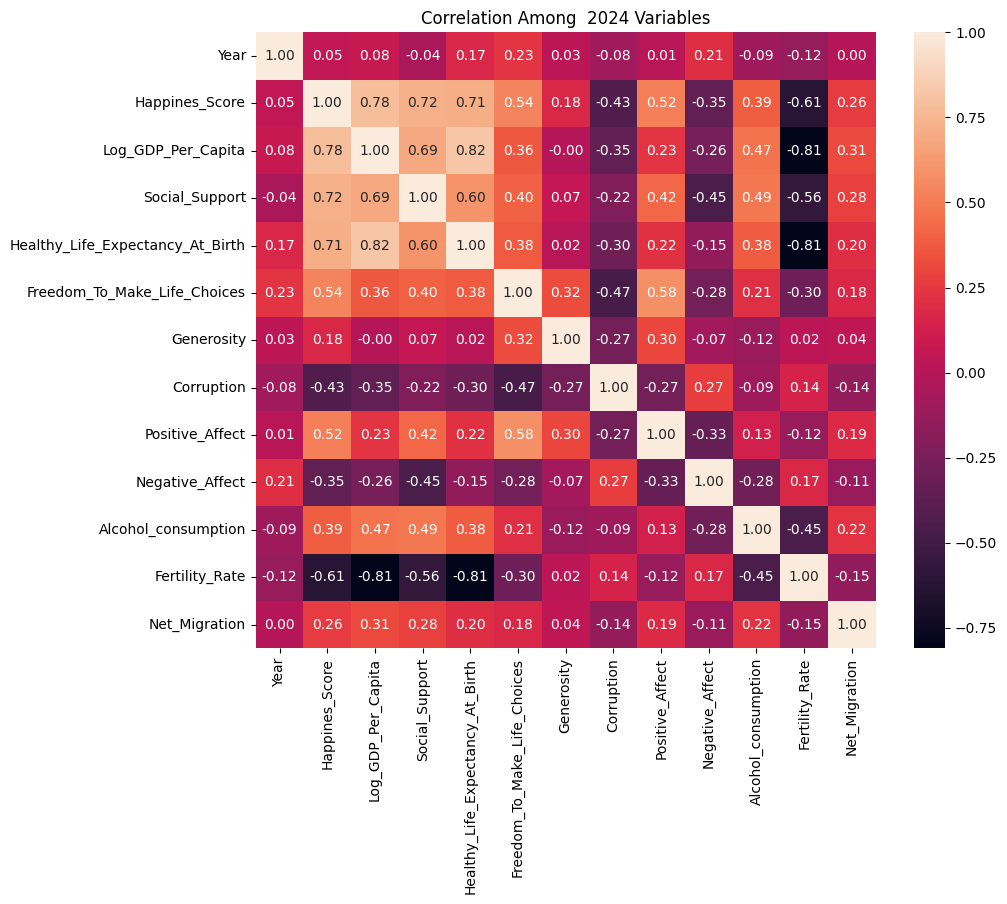

In [2]:
# Recreating the correlation heatmap with the provided dataset structure
correlation_matrix = df_happy[['Year', 'Happines_Score', 'Log_GDP_Per_Capita',
       'Social_Support', 'Healthy_Life_Expectancy_At_Birth',
       'Freedom_To_Make_Life_Choices', 'Generosity', 'Corruption',
       'Positive_Affect', 'Negative_Affect', 'Alcohol_consumption',
       'Fertility_Rate', 'Net_Migration']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f" , cbar=True)
plt.title("Correlation Among  2024 Variables")
plt.show()

2. Outlier Detection and Data Distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


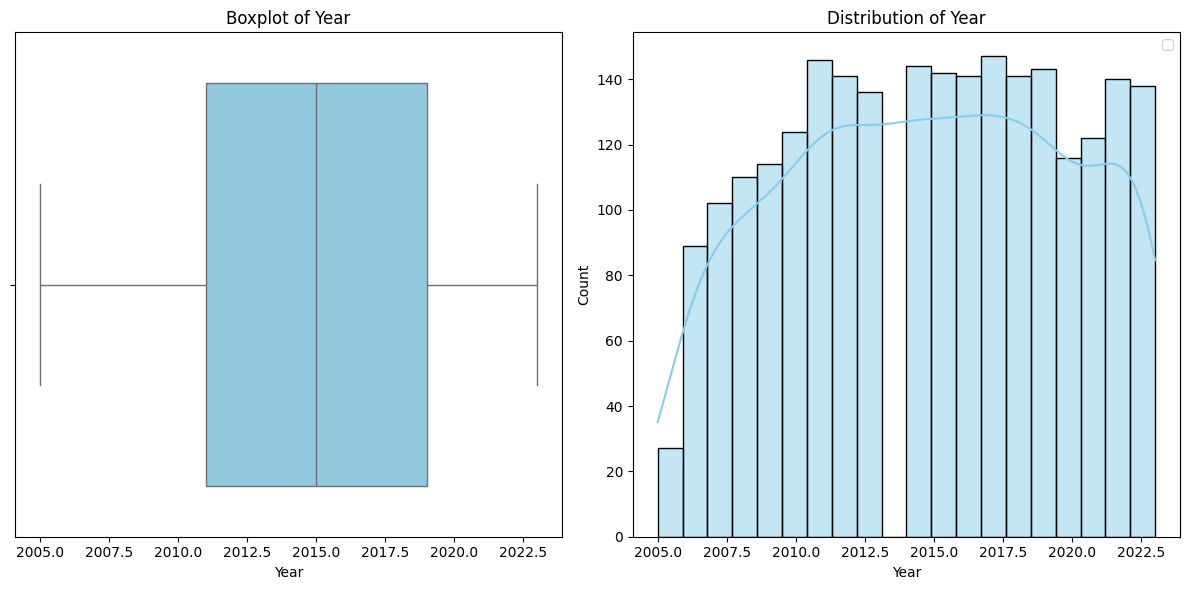

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


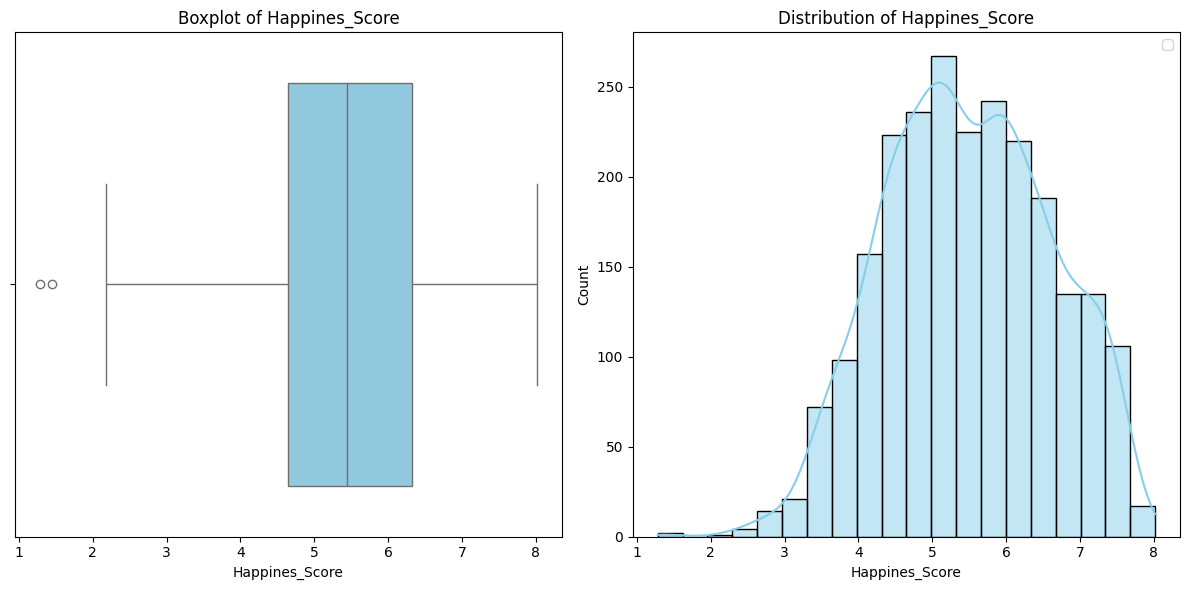

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


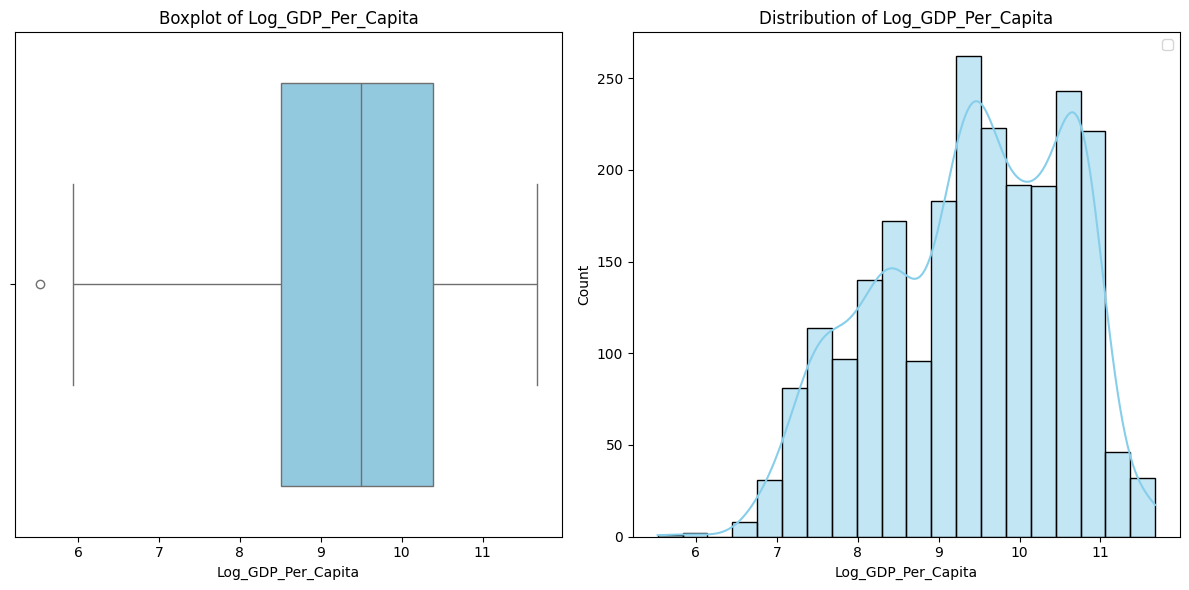

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


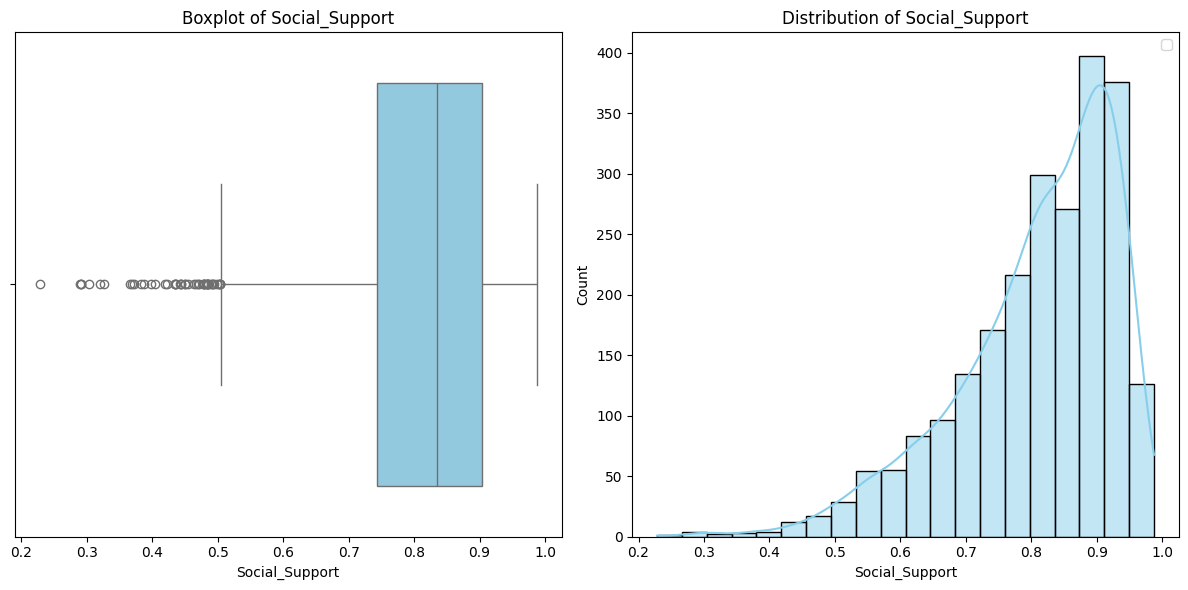

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


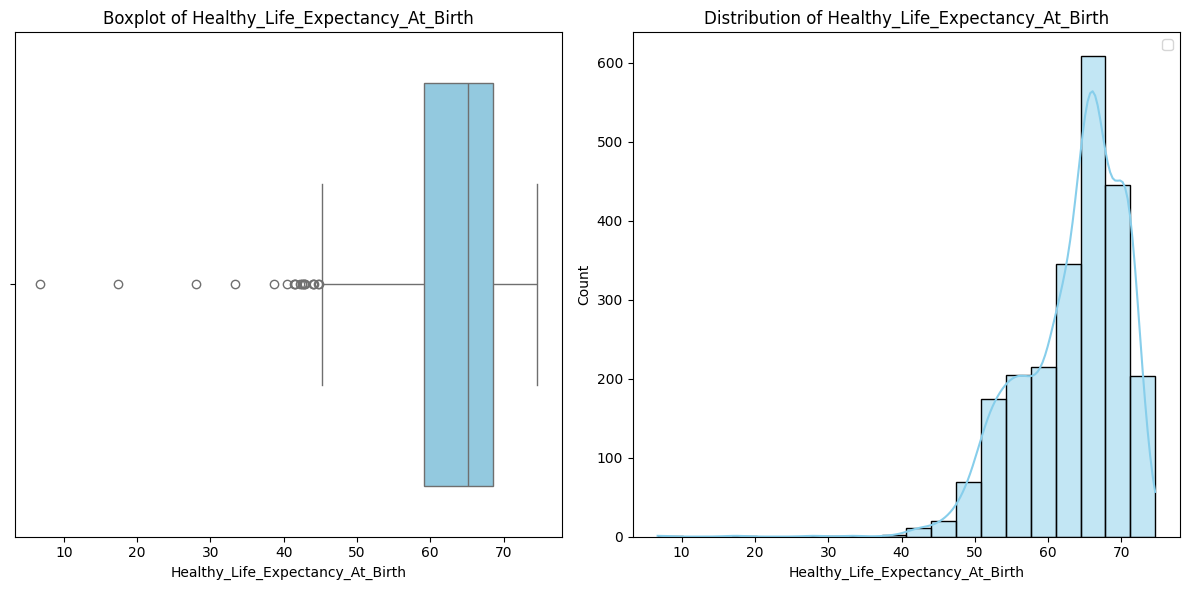

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


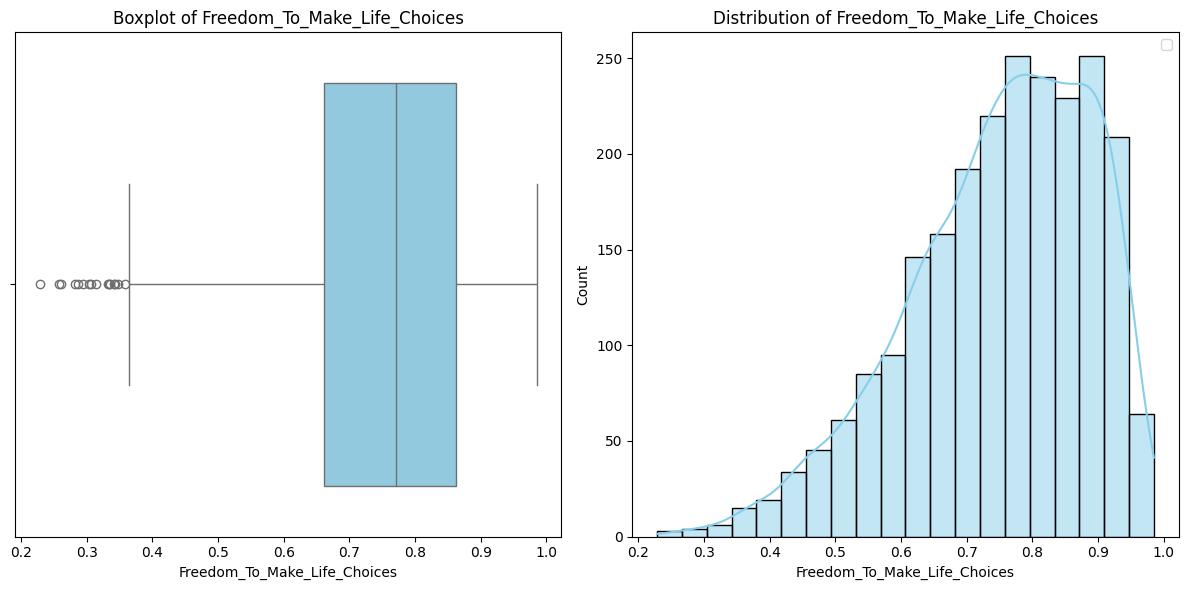

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


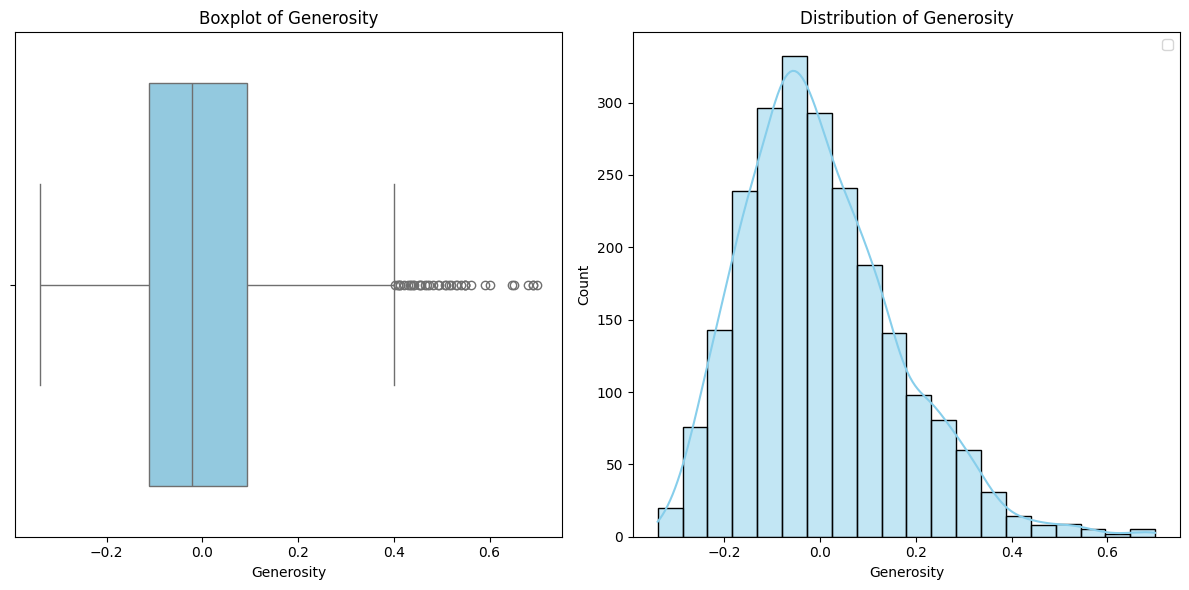

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


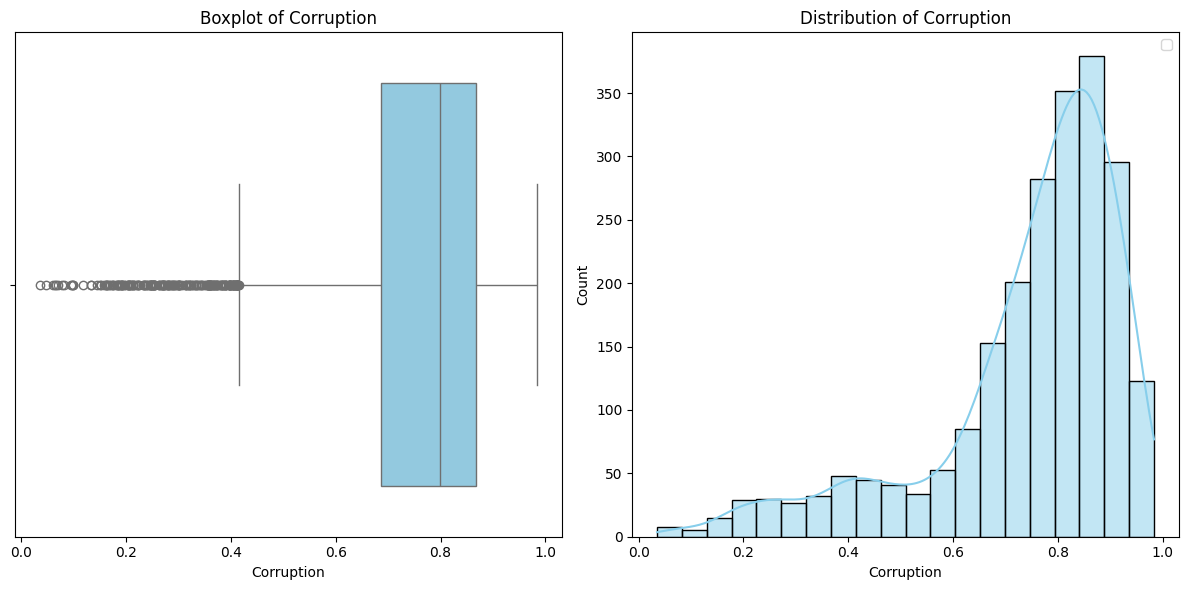

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


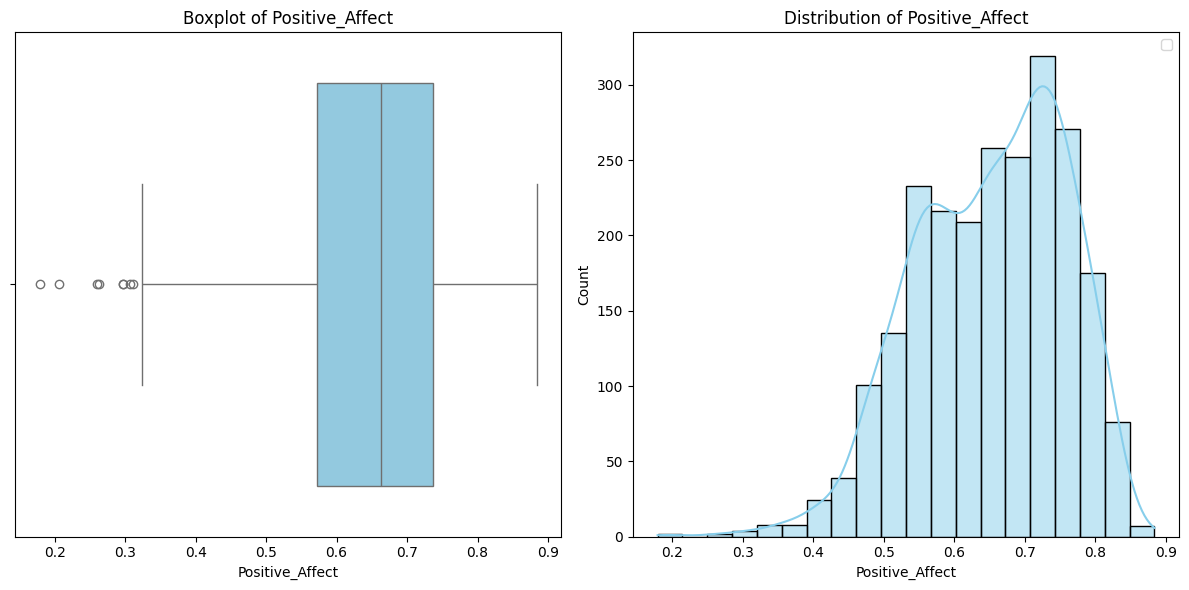

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


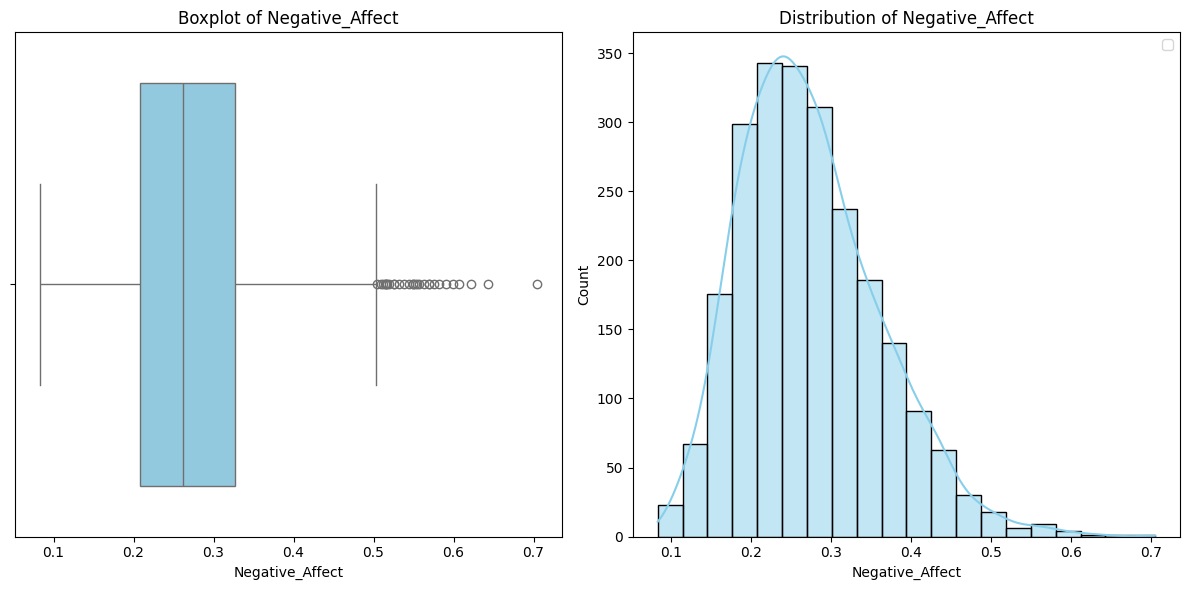

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


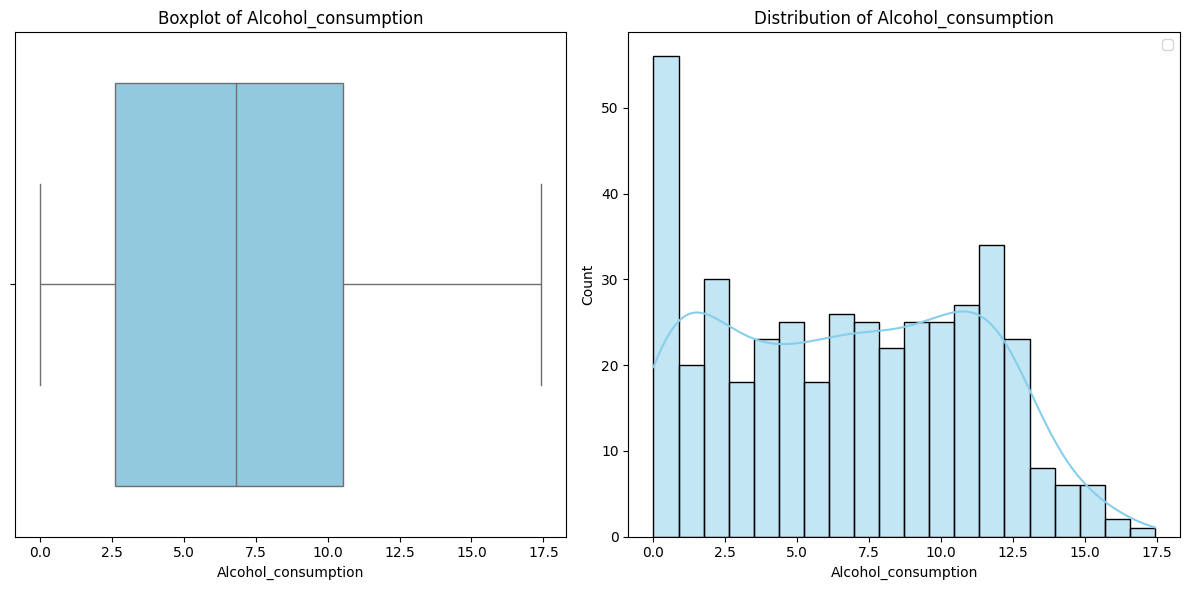

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


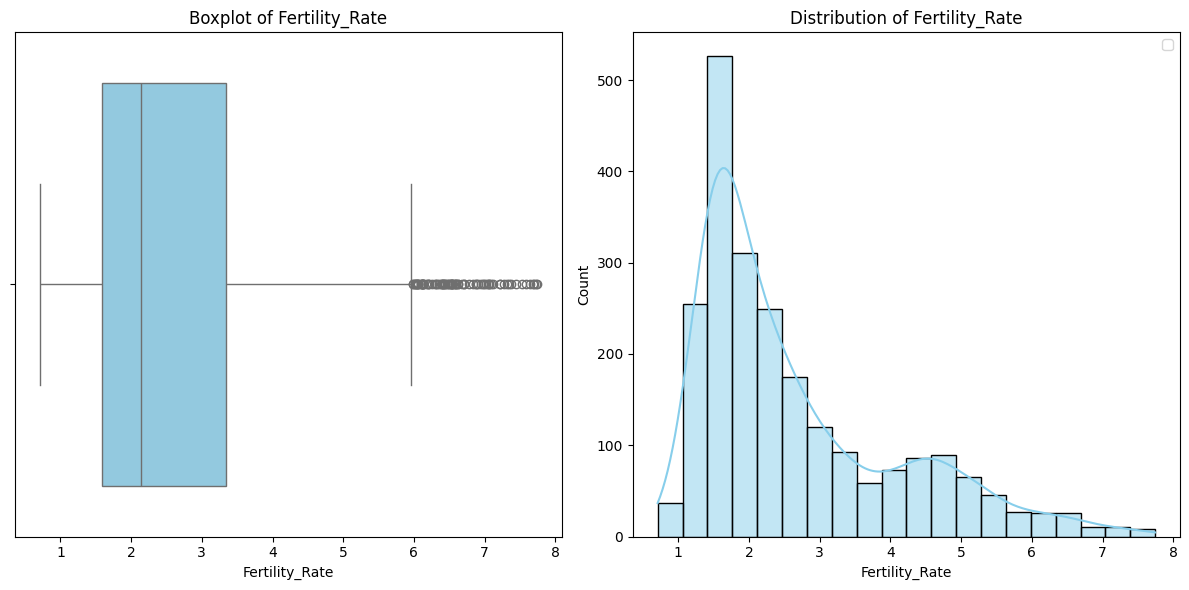

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


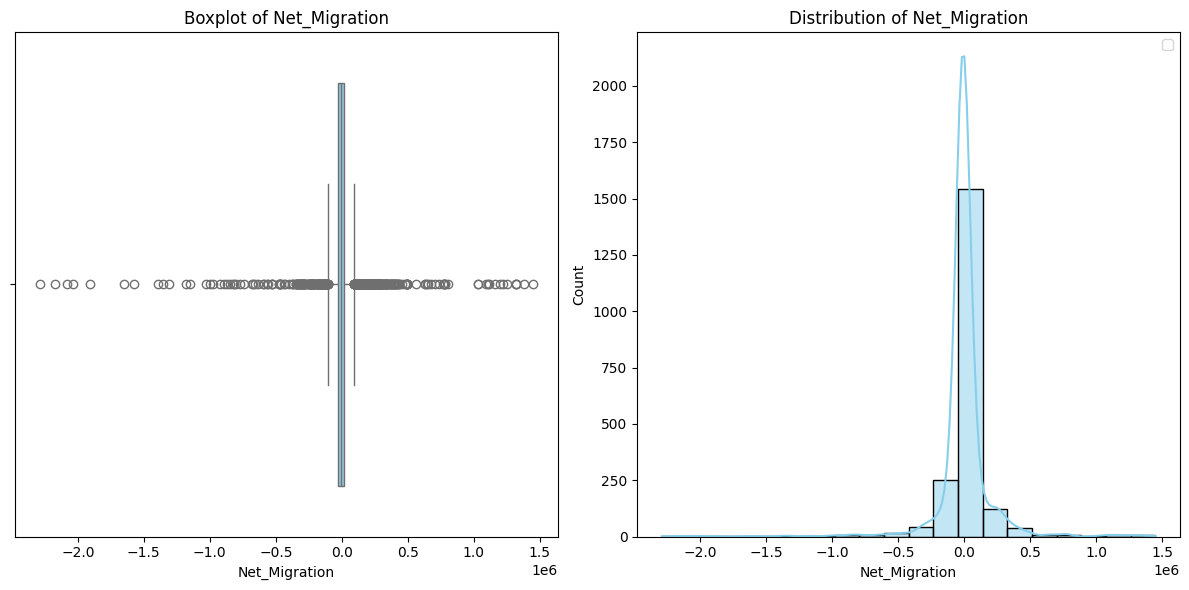

In [3]:
# Detect Outliers (using IQR)
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Visualizing Outliers
def visualize_outliers(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        plt.figure(figsize=(12, 6))
        
        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        
        # Distribution Plot
        plt.subplot(1, 2, 2)
        sns.histplot(df[col], kde=True, color='skyblue', bins=20)
        outliers = detect_outliers_iqr(df[col])
        plt.title(f'Distribution of {col}')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# Visualize all columns
visualize_outliers(df_happy)

## Feature Engineering and Pipeline Selection

A simple pipeline has beec created in order to unify the data selection. 
Steps in the pipeline: 
- Country_Name has been encoded
- All countries, that have 2 or less hapiness data rows have been removed
- Target (Hapiness Score) has been removed from the dataset
- The dataset is split into, test, train and validation data
Steps in the pipeline performed on each, test, train and validation set:
- Drop columns with high (duplicate) or extremely low correlation ({'Healthy_Life_Expectancy_At_Birth', 'Generosity'})
- Imputation:
    - Fill out corruption for China and Turkmenistan with values from Amnesty International
    - The rest of the data for corruption is filled with either mean for the country, or a global mean
    - Same applies for Alcohol Consumption and Net Migration (Note: Taiwan migration has been filled out as 0 based on domain knowledge)
    - Following columns:  [ 'Social_Support','Freedom_To_Make_Life_Choices'
                       , 'Positive_Affect','Negative_Affect','Fertility_Rate',
                       'Log_GDP_Per_Capita'] have been filled out using deterministic regression

    - Lastly, the data was scaled with min max scaler

See build_pipeline.py for detailed code. 

In [4]:
from build_pipeline import build_pipeline
X_test, y_test, X_train, y_train, X_val, y_val = build_pipeline()

c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net_migration['Country_Name'].replace({
c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

### Feature Importance Analysis (Top 5 Features)

In [5]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor  # Use Regressor instead of Classifier

X_train = X_train.select_dtypes(include=['number', 'bool'])
model = RandomForestRegressor()  # Use a regressor for continuous target
rfe = RFE(model, n_features_to_select=5)  # Select one most important feature
rfe.fit(X_train, y_train)

# Feature Rankings
ranking = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_}).sort_values('Rank')
ranking

,Feature,Rank
1,Log_GDP_Per_Capita,1
2,Social_Support,1
3,Freedom_To_Make_Life_Choices,1
5,Positive_Affect,1
8,Fertility_Rate,1
9,Net_Migration,2
10,Country_Encoded,3
7,Alcohol_consumption,4
6,Negative_Affect,5
4,Corruption,6


## Clustering Analysis with PCA
- What makes people happy ? Try to find similarities between regions with similar hapiness score

Since clustering is an unsupervised learning problem, a seperate pipeline has been build for the purpose of this analysis. 

In [6]:
from build_pipeline import build_pipeline_for_clustering
X_train, X_val, X_test = build_pipeline_for_clustering()

c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net_migration['Country_Name'].replace({


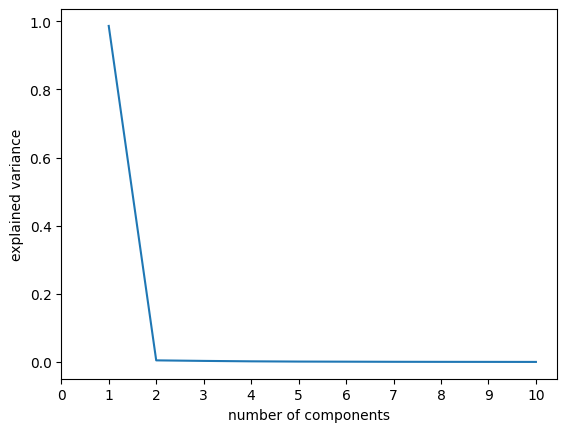

In [7]:
X_train = X_train.drop(columns='Happines_Score')
X_train_num = X_train.select_dtypes(include=['number', 'bool'])

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X_train_num)
#Explained variance vs. number of components
plt.plot(list(range(1, 1 + len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(0, 1 + len(pca.explained_variance_ratio_), step=1))
plt.show()

Based ont the elbow above, we choose 2 components

In [8]:
pca_2 = PCA(2)
X_pca_2 = pca_2.fit_transform(X_train_num)
pca_df = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'], index=X_train.index)
pca_df_with_name = pca_df.copy()
pca_df_with_name['Country_Name'] = X_train['Country_Name']
country_avg_df = pca_df_with_name .groupby('Country_Name')[['PC1', 'PC2']].mean().reset_index()

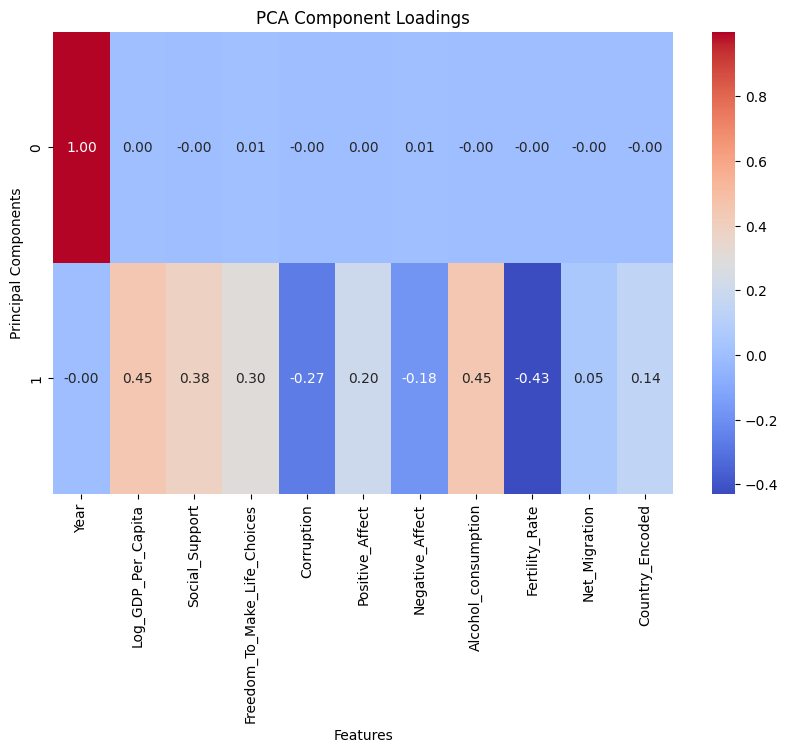

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the PCA components (loadings) as a DataFrame
components_df = pd.DataFrame(pca_2.components_, columns=X_train_num.columns)

# Create a heatmap of the loadings
plt.figure(figsize=(10, 6))
sns.heatmap(components_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('PCA Component Loadings')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()


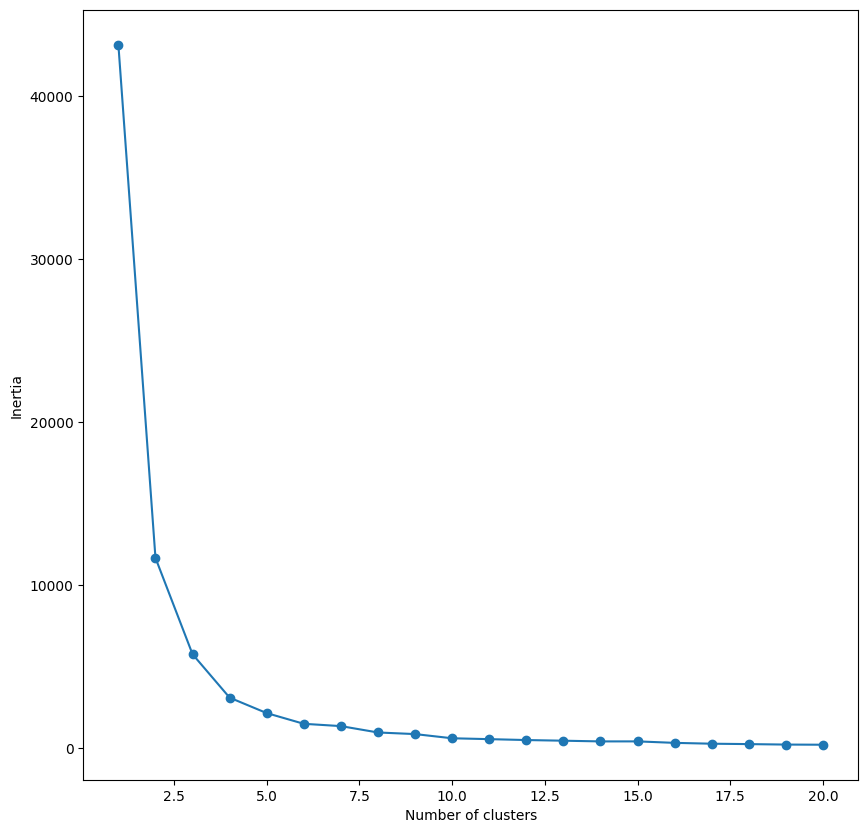

In [10]:
# elbow method to find a good number of clusters (k)
from sklearn.cluster import KMeans
cost = []
for i in range(1, 21):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    cost.append(kmeans.inertia_)
plt.figure(figsize=(10, 10))
plt.plot(range(1, 21), cost, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
kmeans2 = KMeans(n_clusters=2,  random_state=42)
kmeans2.fit_predict(country_avg_df[['PC1', 'PC2']])
kmeans5 = KMeans(n_clusters=3,  random_state=42)
kmeans5.fit_predict(country_avg_df[['PC1', 'PC2']])
kmeans8 = KMeans(n_clusters=5,  random_state=42)
kmeans8.fit_predict(country_avg_df[['PC1', 'PC2']])

array([1, 3, 0, 2, 1, 1, 3, 3, 1, 3, 1, 2, 3, 3, 2, 3, 3, 2, 1, 3, 2, 3,
       3, 1, 1, 4, 2, 1, 1, 1, 3, 3, 0, 1, 3, 0, 1, 1, 4, 1, 1, 1, 1, 3,
       0, 0, 1, 1, 3, 0, 1, 1, 2, 1, 3, 3, 2, 2, 1, 0, 0, 3, 1, 2, 3, 2,
       1, 2, 3, 3, 1, 2, 1, 1, 1, 2, 1, 3, 3, 1, 0, 3, 0, 2, 1, 1, 1, 2,
       3, 1, 1, 0, 2, 1, 3, 1, 0, 3, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1,
       1, 2, 1, 2, 3, 4, 4, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 4, 1, 3, 3, 2,
       2, 2, 3, 1, 4, 3, 1, 1, 3, 3, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3])

In [12]:
import plotly.express as px
import pandas as pd

# Assuming `pca_df_with_name` contains the PCA components, K-means labels, and country names
# Group the data by country and calculate the mean for each country's PCA scores
country_avg_df = pca_df_with_name.groupby('Country_Name')[['PC1', 'PC2']].mean().reset_index()

# Add the K-means labels to the averaged dataframe
country_avg_df['KMeans_2_Labels'] = kmeans2.labels_
country_avg_df['KMeans_5_Labels'] = kmeans5.labels_
country_avg_df['KMeans_8_Labels'] = kmeans8.labels_

# Plot for k=2 clusters with averaged country data
fig_2 = px.scatter(country_avg_df, 
                   x='PC1', y='PC2', 
                   color='KMeans_2_Labels',  # Color by k=2 cluster labels
                   hover_name='Country_Name',  # Show country names on hover
                   title="K-means with k=2 Clusters (Averaged by Country)",
                   labels={'KMeans_2_Labels': 'Cluster'},
                   opacity=0.7,  # Adjust opacity for points
                   text='Country_Name'  # Add country names as text
                  )

# Customize the layout (optional)
fig_2.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')),
    textposition='top right'  # Position the text to the top-right of the points
)

# Update the layout to increase spacing
fig_2.update_layout(
    title="K-means Clustering with k=2 (Averaged by Country)",
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Cluster",
    width=1000,  # Increase width of the plot
    height=600,  # Increase height of the plot
    margin=dict(l=100, r=100, t=100, b=100)  # Increase margins for more space
)

# Show the first figure (k=2)
fig_2.show()

# Plot for k=5 clusters with averaged country data
fig_5 = px.scatter(country_avg_df, 
                   x='PC1', y='PC2', 
                   color='KMeans_5_Labels',  # Color by k=5 cluster labels
                   hover_name='Country_Name',  # Show country names on hover
                   title="K-means with k=3 Clusters (Averaged by Country)",
                   labels={'KMeans_5_Labels': 'Cluster'},
                   opacity=0.7,  # Adjust opacity for points
                   text='Country_Name'  # Add country names as text
                  )

# Customize the layout (optional)
fig_5.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')),
    textposition='top right'  # Position the text to the top-right of the points
)

# Update the layout to increase spacing
fig_5.update_layout(
    title="K-means Clustering with k=3 (Averaged by Country)",
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Cluster",
    width=1000,  # Increase width of the plot
    height=600,  # Increase height of the plot
    margin=dict(l=100, r=100, t=100, b=100)  # Increase margins for more space
)

# Show the second figure (k=5)
fig_5.show()

# Plot for k=8 clusters with averaged country data
fig_8 = px.scatter(country_avg_df, 
                   x='PC1', y='PC2', 
                   color='KMeans_8_Labels',  # Color by k=8 cluster labels
                   hover_name='Country_Name',  # Show country names on hover
                   title="K-means with k=5 Clusters (Averaged by Country)",
                   labels={'KMeans_8_Labels': 'Cluster'},
                   opacity=0.7,  # Adjust opacity for points
                   text='Country_Name'  # Add country names as text
                  )

# Customize the layout (optional)
fig_8.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')),
    textposition='top right'  # Position the text to the top-right of the points
)

# Update the layout to increase spacing
fig_8.update_layout(
    title="K-means Clustering with k=5 (Averaged by Country)",
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Cluster",
    width=1000,  # Increase width of the plot
    height=600,  # Increase height of the plot
    margin=dict(l=100, r=100, t=100, b=100)  # Increase margins for more space
)

# Show the third figure (k=8)
fig_8.show()


From the analyis, we can see that the K-means is clustering vertically into x amount of clusters.
Countries from the nordics, seem to group together, including some other European countries and Canada and Australia. 

The Eastern European Countries are grouping together with the Southern American Countries and China. 

The Middle East and African countries are grouping together as well. 

In [13]:
X_train, X_val, X_test = build_pipeline_for_clustering()

c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [14]:
import plotly.express as px

# Filter data for the specific year and sort by Happiness Score
data_sorted = X_train[X_train['Year'] == 2023].sort_values(by='Happines_Score', ascending=True)

# Create a bar chart
fig_8 = px.bar(
    data_sorted,
    x='Country_Name',  # Country names on the x-axis
    y='Happines_Score',  # Happiness Score on the y-axis
    color='Happines_Score',  # Color bars by Happiness Score for gradient effect
    title="Happiness Scores of All Countries (2023, Sorted from Lowest to Highest)",
    text='Happines_Score',  # Display Happiness Score as text on bars
)

# Customize layout for better visibility
fig_8.update_layout(
    xaxis_title="Country Name",
    yaxis_title="Happiness Score",
    xaxis_tickangle=90,  # Rotate x-axis labels for readability
    showlegend=False,  # Remove legend for a cleaner look
    coloraxis_showscale=False  # Hide color scale bar
)

# Adjust text position on bars
fig_8.update_traces(textposition='outside')

# Show the figure
fig_8.show()


This analysis helped us to show which countries are scoring similar and are grouped together. 

## Regression Models Training
- Lasso
- Polynomial
- SVM 
- Gradient Boosted


In [15]:
performance_data = []

In [16]:
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
X_test, y_test, X_train, y_train, X_val, y_val = build_pipeline()

# Drop the Country_Name column as we have already encoded it
X_train.drop(columns=['Country_Name'], inplace=True)
X_test.drop(columns=['Country_Name'], inplace=True)
X_val.drop(columns=['Country_Name'], inplace=True)


c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





### Lasso Model 

In [17]:
# Find the optimal alpha value for Lasso regression
lasso_cv = LassoCV(alphas = np.linspace(0.01, 1.0, 50), cv=5)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print("Non-zero coefficient:", sum(lasso.coef_ != 0))
print("Score on train set = ", format(lasso.score(X_train, y_train)))

Non-zero coefficient: 6
Score on train set =  0.7649714218394181


Validation Metrics:
R^2: 0.7241000963263537
RMSE: 0.6259768016829076


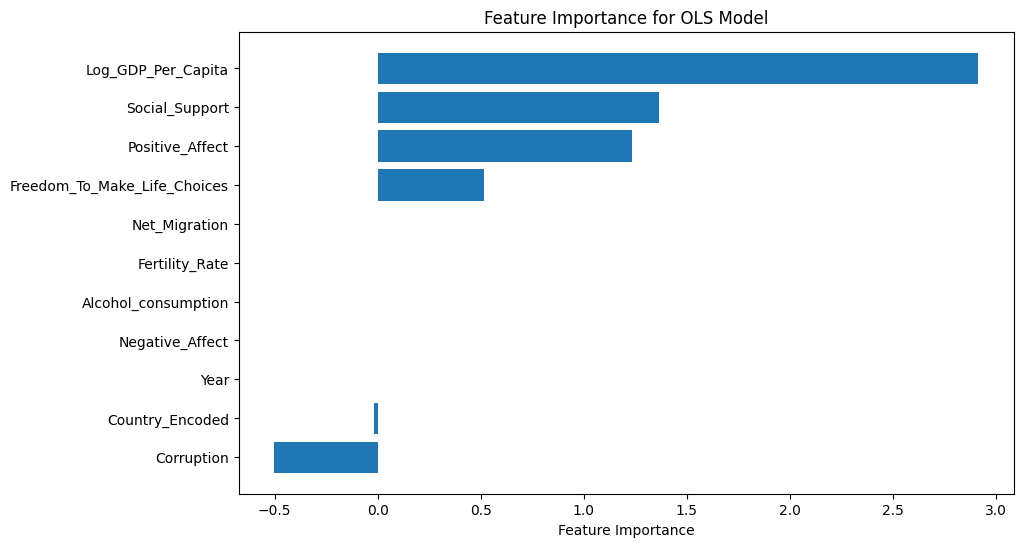

In [18]:
# Measure Model Performance
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
y_val_pred = lasso.predict(X_val)

def plot_feature_importance(model, feature_names):
    importance = model.coef_
    sorted_idx = importance.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance for OLS Model")
    plt.show()
    
# Calculate the RMSE and R^2 score for the validation and test sets
print("Validation Metrics:")
print("R^2:", r2_score(y_val, y_val_pred))
print("RMSE:", sqrt(mean_squared_error(y_val, y_val_pred)))
# Plot the coefficients
plot_feature_importance(lasso, X_train.columns)

performance_data.append({
        'Model': "LassoCV",
        'ModelSpec': lasso,
        'RMSE': sqrt(mean_squared_error(y_val, y_val_pred)),
        'R2 Score': r2_score(y_val, y_val_pred)})



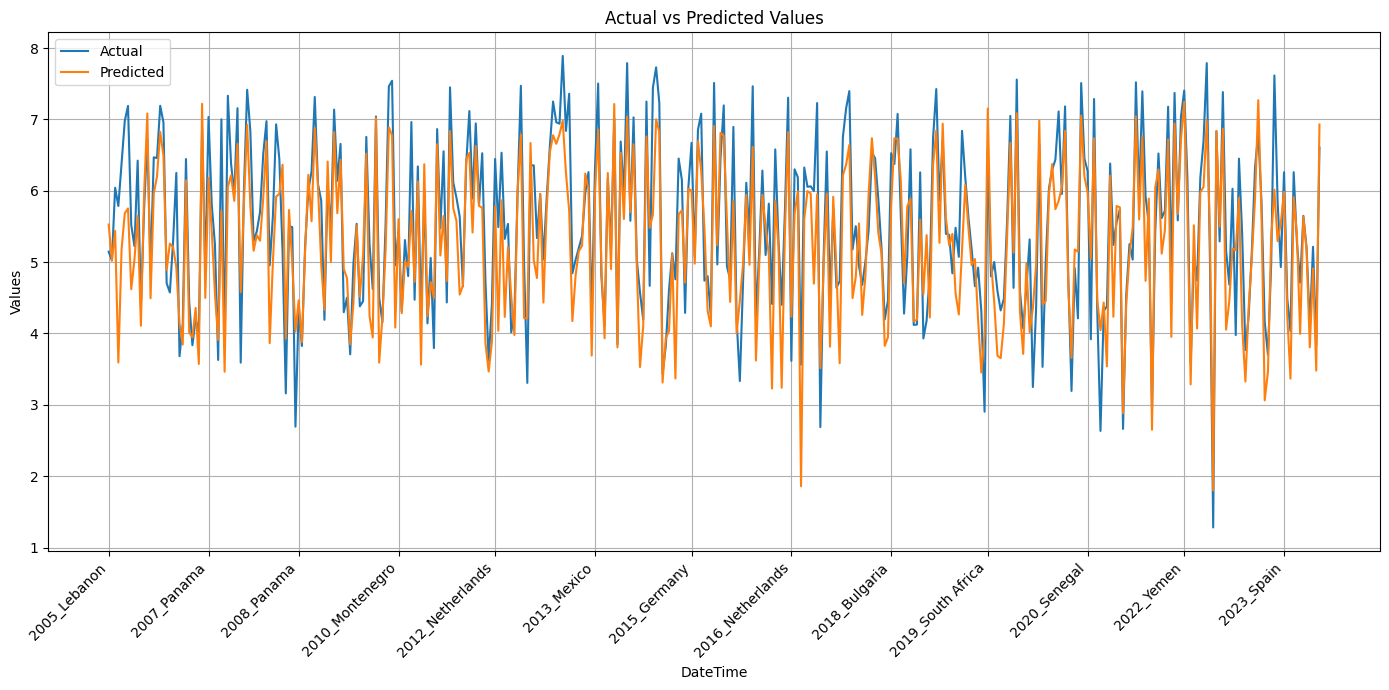

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sort the data by Year to ensure it's in order
X_val.sort_values(by='Year', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(14, 7))  # Larger figure
plt.plot(X_val.index, y_val, label='Actual')
plt.plot(X_val.index, y_val_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Set monthly ticks
# Rotate and align x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)
# Add grid, legend, and adjust layout
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure everything fits within the figure

# Show the plot
plt.show()


## Polynomial Modal

In [20]:
# Train the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

ols_poly = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

ols_poly.fit(X_train_poly, y_train)
ols_poly.score(X_train_poly, y_train)

y_val_pred_poly = ols_poly.predict(poly.transform(X_val))

# Calculate the RMSE and R^2 score for the validation and test sets
print("Validation Metrics:")
print("R^2:", r2_score(y_val, y_val_pred_poly))
print("RMSE:", sqrt(mean_squared_error(y_val, y_val_pred_poly)))
performance_data.append({
        'Model': "PolynomialFeatures",
        'ModelSpec': poly,
        'RMSE': sqrt(mean_squared_error(y_val, y_val_pred_poly)),
        'R2 Score': r2_score(y_val, y_val_pred_poly)})

Validation Metrics:
R^2: -1.0047056618989147
RMSE: 1.6873600902267016


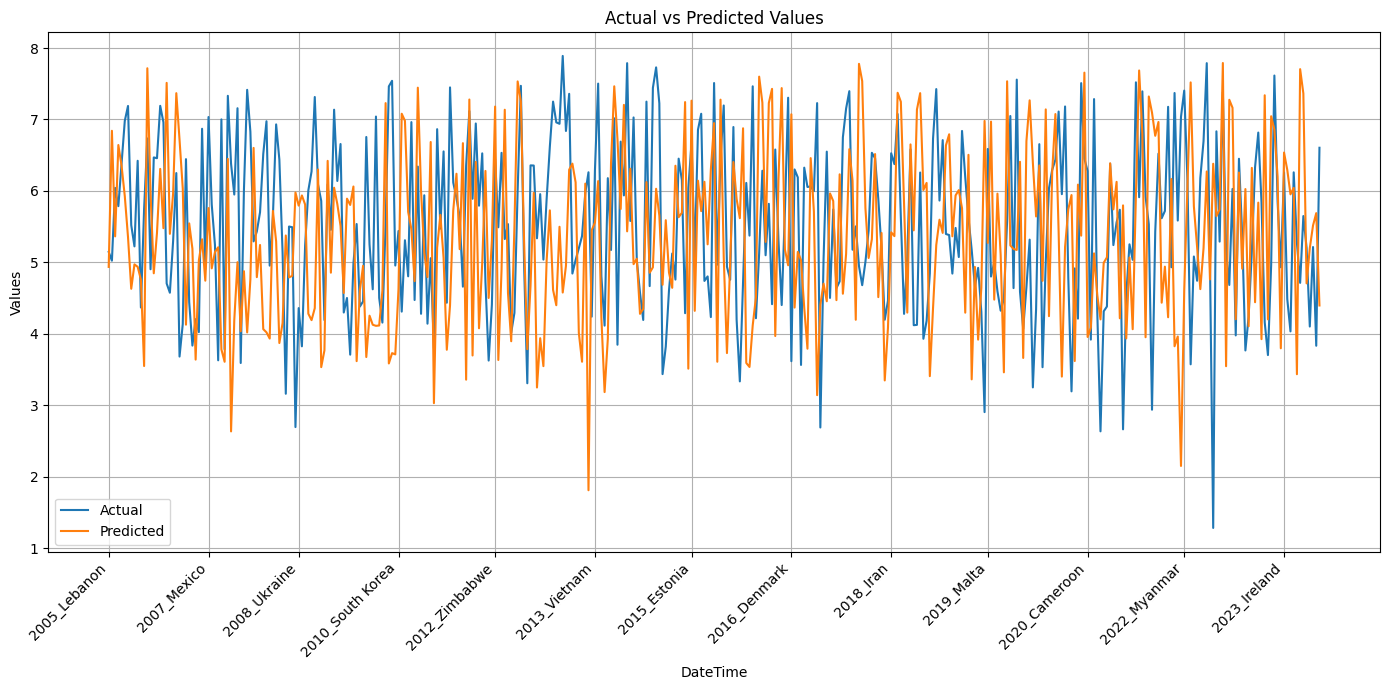

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sort the data by Year to ensure it's in order
X_val.sort_values(by='Year', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(14, 7))  # Larger figure
plt.plot(X_val.index, y_val, label='Actual')
plt.plot(X_val.index, y_val_pred_poly , label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Set monthly ticks
# Rotate and align x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)
# Add grid, legend, and adjust layout
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure everything fits within the figure

# Show the plot
plt.show()

## SVM Machine

In [22]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [23]:
X_test, y_test, X_train, y_train, X_val, y_val = build_pipeline()

c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [24]:
# Drop non-numeric columns 'Country_Name'
X_train = X_train.drop(columns=['Country_Name'], errors='ignore')
X_val = X_val.drop(columns=['Country_Name'], errors='ignore')
X_test = X_test.drop(columns=['Country_Name'], errors='ignore')

In [25]:
#Default 
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    print("-" * 30)

# Evaluate SVM
evaluate_model(y_val, y_pred_svm, "Support Vector Machine")



Support Vector Machine Performance:
  RMSE: 0.5805
  R2 Score: 0.7627
------------------------------


In [26]:
#RandomizedSearchCV

# Define parameter distributions
param_distributions = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'gamma': uniform(0.001, 1),  # Uniform distribution between 0.001 and 1
    'epsilon': uniform(0.1, 0.5)  # Uniform distribution between 0.1 and 0.5
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVR(kernel='rbf'),
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2
)

# Fit to training data
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_svm_model = random_search.best_estimator_

print("Best parameters found: ", best_params)

y_val_pred = best_svm_model.predict(X_val)

performance_data.append({
        "Model": "RandomizedSearchCV",
        'ModelSpec': best_svm_model,
        'RMSE': sqrt(mean_squared_error(y_val, y_val_pred)),
        'R2 Score': r2_score(y_val, y_val_pred)})


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END C=37.55401188473625, epsilon=0.5753571532049581, gamma=0.7329939418114051; total time=   0.0s
[CV] END C=37.55401188473625, epsilon=0.5753571532049581, gamma=0.7329939418114051; total time=   0.0s
[CV] END C=37.55401188473625, epsilon=0.5753571532049581, gamma=0.7329939418114051; total time=   0.0s
[CV] END C=59.96584841970366, epsilon=0.17800932022121826, gamma=0.15699452033620265; total time=   0.0s
[CV] END C=59.96584841970366, epsilon=0.17800932022121826, gamma=0.15699452033620265; total time=   0.0s
[CV] END C=59.96584841970366, epsilon=0.17800932022121826, gamma=0.15699452033620265; total time=   0.0s
[CV] END C=5.908361216819946, epsilon=0.5330880728874676, gamma=0.6021150117432088; total time=   0.0s
[CV] END C=5.908361216819946, epsilon=0.5330880728874676, gamma=0.6021150117432088; total time=   0.0s
[CV] END C=5.908361216819946, epsilon=0.5330880728874676, gamma=0.6021150117432088; total time=   0.0s
[CV] E

In [27]:
# Evaluate RadnomizedSearch SVM
evaluate_model(y_val, y_val_pred, "RandomizedSearch SVM")

RandomizedSearch SVM Performance:
  RMSE: 0.5696
  R2 Score: 0.7716
------------------------------


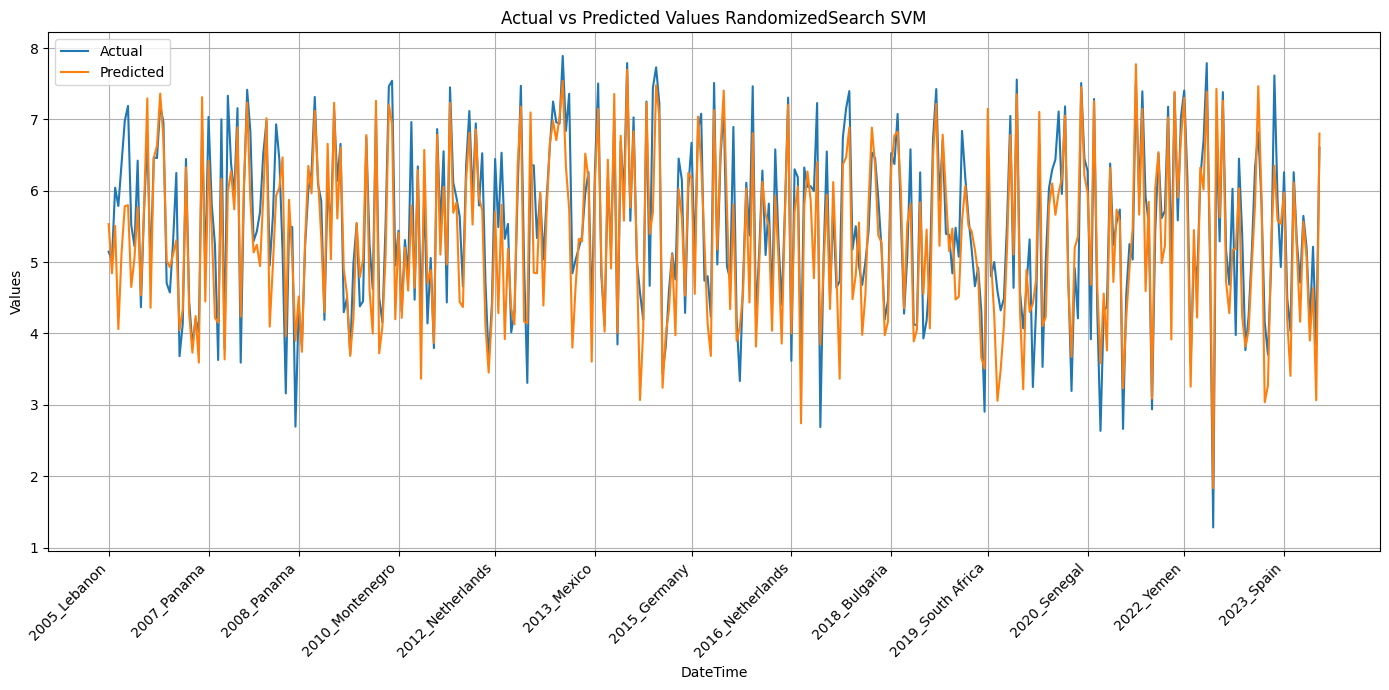

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sort the data by Year to ensure it's in order
X_val.sort_values(by='Year', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(14, 7))  # Larger figure
plt.plot(X_val.index, y_val, label='Actual')
plt.plot(X_val.index, y_val_pred , label='Predicted')
plt.title('Actual vs Predicted Values RandomizedSearch SVM')
plt.xlabel('DateTime')
plt.ylabel('Values')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Set monthly ticks
# Rotate and align x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)
# Add grid, legend, and adjust layout
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure everything fits within the figure

# Show the plot
plt.show()

## Gradient Boosted

In [29]:
X_train_no_year = X_train.drop(columns = 'Year')
X_val_no_year = X_val.drop(columns='Year')

In [30]:
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train_no_year, y_train)
y_pred_gbm = gbm_model.predict(X_val_no_year)
evaluate_model(y_val, y_pred_gbm, "Gradient Boosted Model")
performance_data.append({
        'Model': "Gradient Boosted Model",
        "ModelSpec": gbm_model,
        'RMSE': sqrt(mean_squared_error(y_val, y_pred_gbm)),
        'R2 Score': r2_score(y_val, y_pred_gbm)})

Gradient Boosted Model Performance:
  RMSE: 1.6196
  R2 Score: -0.8468
------------------------------


In [31]:
#Define parameter distributions
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2
)

# Fit to training data
random_search_gbm.fit(X_train, y_train)

# Get the best parameters and model
best_params_gbm = random_search_gbm.best_params_
best_gbm_model = random_search_gbm.best_estimator_

print("Best parameters found: ", best_params_gbm)

# Evaluate the best GBM model on validation set
y_val_pred_gbm = best_gbm_model.predict(X_val)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=

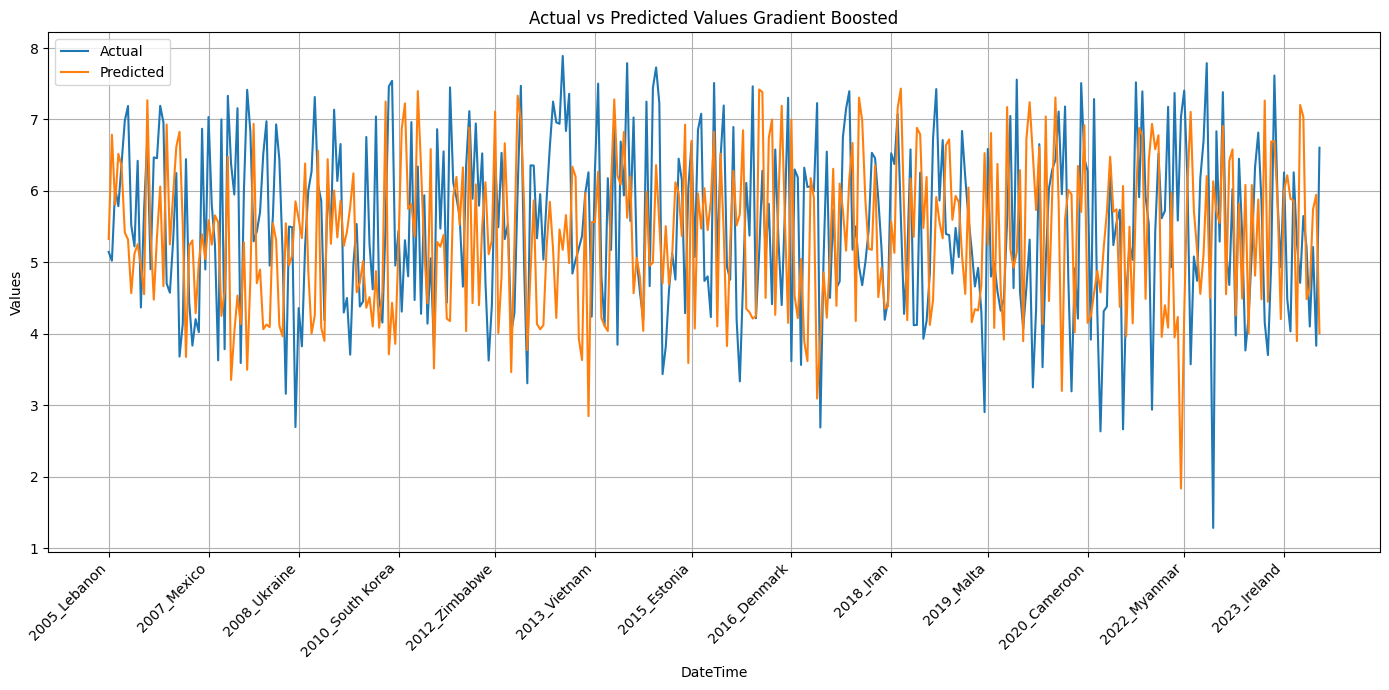

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sort the data by Year to ensure it's in order
X_val.sort_values(by='Year', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(14, 7))  # Larger figure
plt.plot(X_val.index, y_val, label='Actual')
plt.plot(X_val.index, y_val_pred_gbm , label='Predicted')
plt.title('Actual vs Predicted Values Gradient Boosted')
plt.xlabel('DateTime')
plt.ylabel('Values')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Set monthly ticks
# Rotate and align x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)
# Add grid, legend, and adjust layout
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure everything fits within the figure

# Show the plot
plt.show()

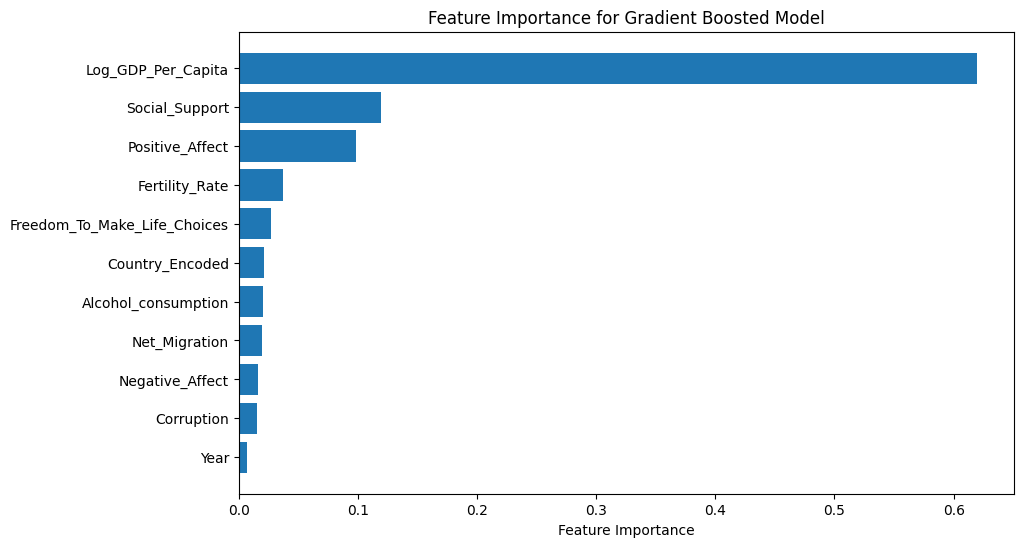

In [33]:
# Feature Importance for GBM
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    sorted_idx = importance.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance for Gradient Boosted Model")
    plt.show()

plot_feature_importance(best_gbm_model, X_train.columns)

In [34]:
# Retain only significant features
significant_features = [
    'Log_GDP_Per_Capita',
    'Social_Support',
    'Positive_Affect',
    'Fertility_Rate',
    'Freedom_To_Make_Life_Choices'  # Optional based on threshold
]

X_train_filtered = X_train[significant_features]
X_val_filtered = X_val[significant_features]
X_test_filtered = X_test[significant_features]

# Train Gradient Boosted Model on filtered dataset
gbm_filtered_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_filtered_model.fit(X_train_filtered, y_train)

# Evaluate on validation set
y_val_pred_gbm_filtered = gbm_filtered_model.predict(X_val_filtered)
evaluate_model(y_val, y_val_pred_gbm_filtered, "Filtered Gradient Boosted Model")

# Train Support Vector Machine on filtered dataset
svm_filtered_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_filtered_model.fit(X_train_filtered, y_train)

# Evaluate on validation set
y_val_pred_svm_filtered = svm_filtered_model.predict(X_val_filtered)
evaluate_model(y_val, y_val_pred_svm_filtered, "Filtered Support Vector Machine")

performance_data.append({
        "Model": "SVR",
        'ModelSpec': svm_filtered_model,
        'RMSE': sqrt(mean_squared_error(y_val, y_val_pred_svm_filtered)),
        'R2 Score': r2_score(y_val, y_val_pred_svm_filtered)})

performance_data.append({
        'Model': "GradientBoostingRegressor",
        'ModelSpec': gbm_filtered_model,
        'RMSE': sqrt(mean_squared_error(y_val, y_val_pred_gbm_filtered)),
        'R2 Score': r2_score(y_val, y_val_pred_gbm_filtered)})

Filtered Gradient Boosted Model Performance:
  RMSE: 1.5611
  R2 Score: -0.7158
------------------------------
Filtered Support Vector Machine Performance:
  RMSE: 1.5818
  R2 Score: -0.7617
------------------------------


In [37]:
performance_df = pd.DataFrame(performance_data)
performance_df_sorted = performance_df.sort_values(by='RMSE', ascending=True)
performance_df_sorted

,Model,ModelSpec,RMSE,R2 Score
2,RandomizedSearchCV,"SVR(C=60.85448519014384, epsilon=0.18526206184...",0.569601,0.771557
0,LassoCV,Lasso(alpha=0.01),0.625977,0.724100
5,GradientBoostingRegressor,([DecisionTreeRegressor(criterion='friedman_ms...,1.561063,-0.715837
4,SVR,"SVR(C=100, gamma=0.1)",1.581802,-0.761731
3,Gradient Boosted Model,([DecisionTreeRegressor(criterion='friedman_ms...,1.619562,-0.846843
1,PolynomialFeatures,PolynomialFeatures(),1.687360,-1.004706


According to the Table Above the best performing model is the Randomized SearchCV. Therefore this model will be retrained on a train + val data and then tested against test data. 

## Fine Tuning Best Performing Model

Add train and validation data together

In [38]:
X_combined = pd.concat([X_train, X_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

In [41]:
#RandomizedSearchCV

# Define parameter distributions
param_distributions = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'gamma': uniform(0.001, 1),  # Uniform distribution between 0.001 and 1
    'epsilon': uniform(0.1, 0.5)  # Uniform distribution between 0.1 and 0.5
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVR(kernel='rbf'),
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2
)

# Fit to training data
random_search.fit(X_combined, y_combined)

# Get the best parameters and model
best_params = random_search.best_params_
best_svm_model = random_search.best_estimator_
y_test_pred = best_svm_model.predict(X_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END C=37.55401188473625, epsilon=0.5753571532049581, gamma=0.7329939418114051; total time=   0.1s
[CV] END C=37.55401188473625, epsilon=0.5753571532049581, gamma=0.7329939418114051; total time=   0.1s
[CV] END C=37.55401188473625, epsilon=0.5753571532049581, gamma=0.7329939418114051; total time=   0.0s
[CV] END C=59.96584841970366, epsilon=0.17800932022121826, gamma=0.15699452033620265; total time=   0.1s
[CV] END C=59.96584841970366, epsilon=0.17800932022121826, gamma=0.15699452033620265; total time=   0.1s
[CV] END C=59.96584841970366, epsilon=0.17800932022121826, gamma=0.15699452033620265; total time=   0.1s
[CV] END C=5.908361216819946, epsilon=0.5330880728874676, gamma=0.6021150117432088; total time=   0.0s
[CV] END C=5.908361216819946, epsilon=0.5330880728874676, gamma=0.6021150117432088; total time=   0.0s
[CV] END C=5.908361216819946, epsilon=0.5330880728874676, gamma=0.6021150117432088; total time=   0.0s
[CV] E

In [42]:
print( f'RMSE {sqrt(mean_squared_error(y_test, y_test_pred ))}')
print(f'R2 Score{ r2_score(y_test, y_test_pred)}')

RMSE 0.6164861626414262
R2 Score0.6857491349172398


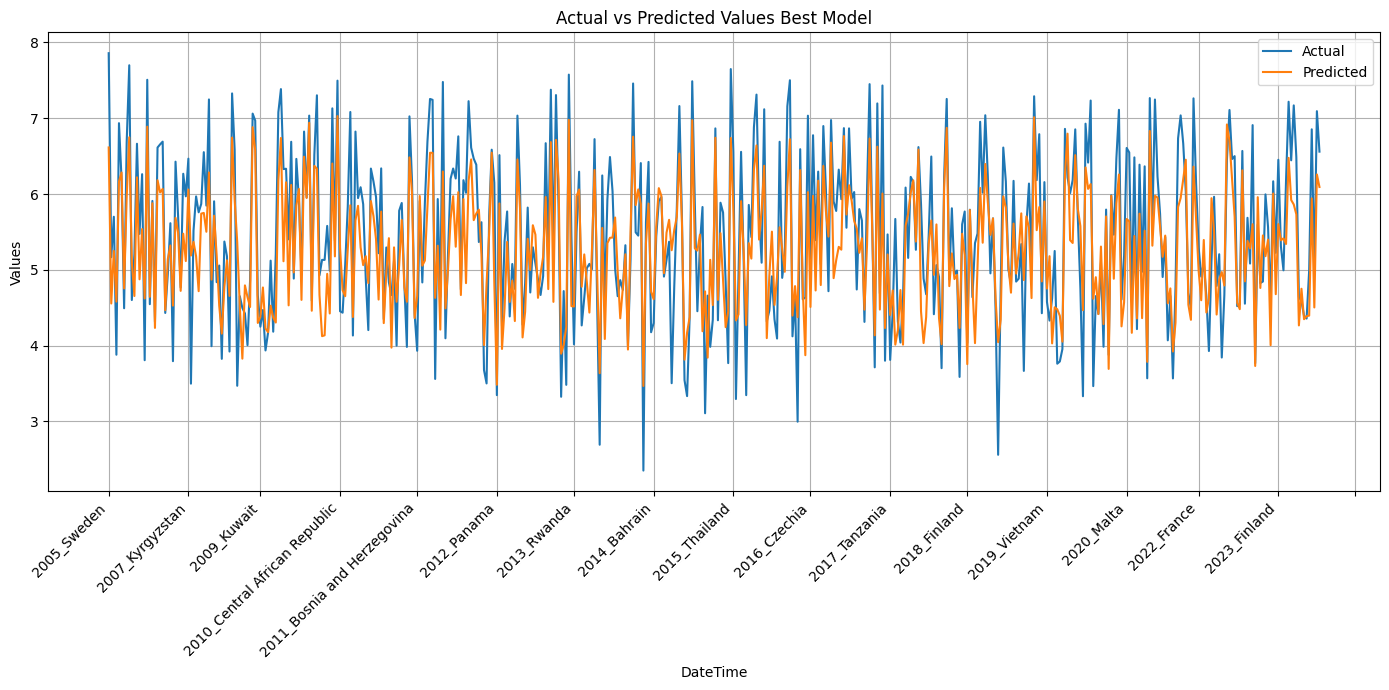

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sort the data by Year to ensure it's in order
X_test.sort_values(by='Year', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(14, 7))  # Larger figure
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, y_test_pred , label='Predicted')
plt.title('Actual vs Predicted Values Best Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Set monthly ticks
# Rotate and align x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)
# Add grid, legend, and adjust layout
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure everything fits within the figure

# Show the plot
plt.show()

## Future Predictions

In [63]:
X_test, y_test, X_train, y_train, X_val, y_val = build_pipeline()
denmark_data = X_train[X_train['Country_Name'] == 'Denmark'].sort_values('Year').iloc[-1]

c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
import pandas as pd
import numpy as np

# Define the number of years to predict
years_future = np.arange(2025, 2051)

# Define the growth rates for the features (adjust as needed)
growth_rates = {
    'Log_GDP_Per_Capita': 0.02,  # 2% annual growth
    'Social_Support': 0.01,  # 1% annual growth
    'Freedom_To_Make_Life_Choices': 0.005,  # 0.5% annual growth
    'Corruption': -0.005,  # -0.5% annual decrease (improvement)
    'Positive_Affect': 0.005,  # 0.5% annual growth
    'Negative_Affect': -0.002,  # -0.2% annual decrease (improvement)
    'Alcohol_consumption': 0.001,  # 0.1% annual growth
    'Fertility_Rate': -0.01,  # -1% annual decrease
    'Net_Migration': 0.002,  # 0.2% annual growth
    'Country_Encoded': 0.234177  # Since this is an encoding, we don't need to change it
}

# Initialize a list to store the generated future data
future_data = []

# Generate the future data for Denmark (from 2025 to 2050)
for year in years_future:
    # Start with the most recent data for Denmark
    future_row = denmark_data.copy()
    
    # Update the 'Year' column
    future_row['Year'] = year
    
    # Apply the growth rates to each feature (except 'Year' and 'Country_Encoded')
    for feature, growth_rate in growth_rates.items():
        if feature not in ['Year', 'Country_Encoded']:
            future_row[feature] *= (1 + growth_rate)
    
    # Add the row to the future_data list
    future_data.append(future_row)

# Convert the future data into a DataFrame
future_df = pd.DataFrame(future_data)

In [65]:
future_df = future_df.reset_index()
future_df['Year_Country'] = future_df['Year'].astype(str) + "_" + future_df['Country_Name']
future_df = future_df.set_index('Year_Country')
future_df = future_df.drop(columns=['Country_Name', 'index'])


In [71]:
y_future_pred = best_svm_model.predict(future_df)


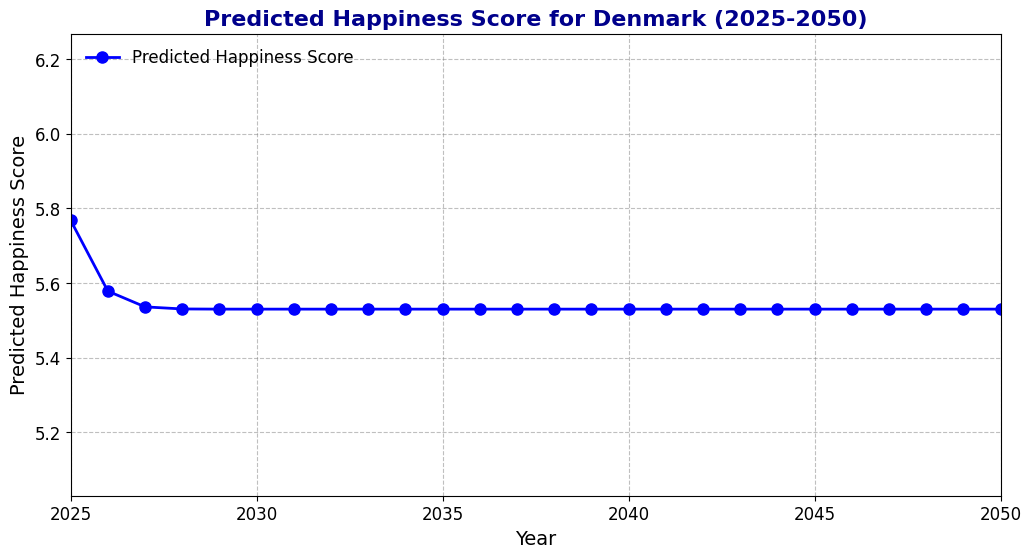

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a larger plot with enhanced style
plt.figure(figsize=(12, 6))

# Plot the predicted happiness scores for Denmark
plt.plot(future_df['Year'], y_future_pred, 
         marker='o', 
         linestyle='-', 
         color='b',  # Blue line for better visibility
         markersize=8,  # Larger markers
         linewidth=2,  # Thicker line
         label='Predicted Happiness Score')

# Title and labels with a nicer font
plt.title('Predicted Happiness Score for Denmark (2025-2050)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Predicted Happiness Score', fontsize=14)

# Customize the x-axis ticks and y-axis limits (for better visibility)
plt.xticks(np.arange(2025, 2051, 5), fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2025, 2050)  # Set x-axis limits
plt.ylim(min(y_future_pred)- 0.5, max(y_future_pred) + 0.5)  # Y-limit with padding

# Add gridlines with a lighter color
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
# Add a legend in a more prominent location
plt.legend(loc='upper left', fontsize=12, frameon=False)

# Optionally annotate some key years or 
